In [55]:
#importing libraries for EDA 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [56]:
df = pd.read_csv("https://raw.githubusercontent.com/WidhyaOrg/datasets/master/instagram_reach.csv")

In [57]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [58]:
df.shape

(100, 8)

In [59]:
df.info

<bound method DataFrame.info of     Unnamed: 0  S.No  ... Time since posted Likes
0            0     1  ...          11 hours   139
1            1     2  ...           2 hours    23
2            2     3  ...           2 hours    25
3            3     4  ...           3 hours    49
4            4     5  ...           3 hours    30
..         ...   ...  ...               ...   ...
95           8    19  ...           3 hours    31
96           9    21  ...           3 hours    42
97          10    22  ...           3 hours    10
98          11    24  ...           3 hours   222
99          12    25  ...           3 hours   109

[100 rows x 8 columns]>

In [60]:
df['Time'] = df['Time since posted'].str.split(" ").str[0].astype('int64')

In [61]:
df.drop(['Unnamed: 0','S.No','USERNAME','Caption','Hashtags','Time since posted'],axis=1)

,Followers,Likes,Time
0,1600,139,11
1,880,23,2
2,255,25,2
3,340,49,3
4,304,30,3
...,...,...,...
95,614,31,3
96,450,42,3
97,182,10,3
98,2039,222,3


In [62]:
# EDA and Visulaization

In [63]:
X = df.loc[:,['Followers','Time']]

In [64]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Followers  100 non-null    int64
 1   Time       100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


In [65]:
X.describe()

,Followers,Time
count,100.00000,100.000000
mean,961.96000,3.460000
std,1014.62567,3.394648
min,11.00000,2.000000
25%,252.75000,2.000000
50%,612.00000,2.000000
75%,1197.00000,3.000000
max,4496.00000,24.000000


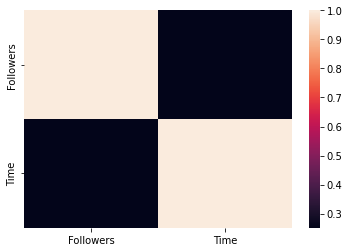

In [66]:
X.corr()
sb.heatmap(X.corr())

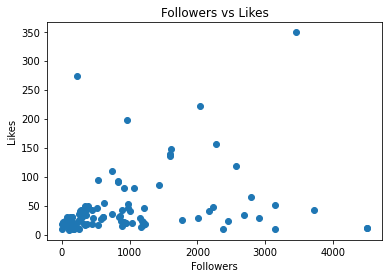

In [67]:
plt.scatter(df.Followers,df.Likes)
plt.xlabel('Followers')
plt.ylabel('Likes')
plt.title('Followers vs Likes')
plt.show()

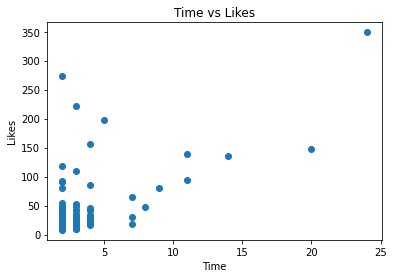

In [68]:
plt.scatter(df.Time, df.Likes)
plt.xlabel('Time')
plt.ylabel('Likes')
plt.title('Time vs Likes')
plt.show()

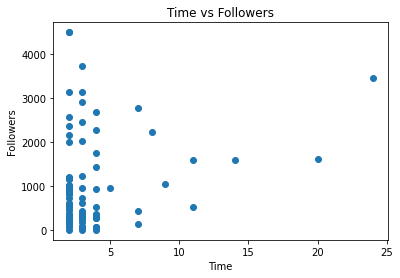

In [69]:
plt.scatter(df.Time, df.Followers)
plt.xlabel('Time')
plt.ylabel('Followers')
plt.title('Time vs Followers')
plt.show()

(array([70., 14.,  7.,  3.,  2.,  1.,  1.,  1.,  0.,  1.]),
 array([  8. ,  42.1,  76.2, 110.3, 144.4, 178.5, 212.6, 246.7, 280.8,
        314.9, 349. ]),
 <a list of 10 Patch objects>)

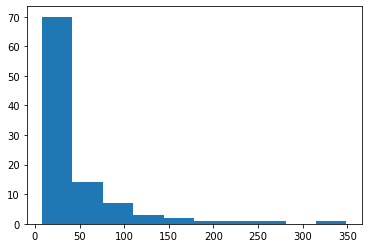

In [77]:
plt.hist(df.Likes)

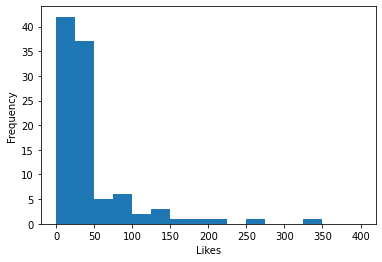

In [80]:
plt.hist(df.Likes, bins=[0,25,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400]) 
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.show()  

In [ ]:
# Model Building

In [81]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error # To evaluate the model

In [82]:
X = df.loc[:,['Followers', 'Time']]
y = df.Likes

In [83]:
X

,Followers,Time
0,1600,11
1,880,2
2,255,2
3,340,3
4,304,3
...,...,...
95,614,3
96,450,3
97,182,3
98,2039,3


In [84]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [85]:
model = LinearRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [89]:
mean_squared_error(y_predict,y_test,squared=False).round(2)

25.74

In [93]:
y_predict

array([ 27.56781133,  41.2136899 ,  34.32789472,  34.02665902,
        38.7860846 ,  45.4326632 ,  36.95927711,  27.51465209,
        47.2455901 ,  66.06396116,  38.46712915,  30.3055122 ,
        31.82055055,  35.87118625,  38.97214194,  45.98197535,
        34.36333421, 103.26775103, 154.93085425,  28.55125727])

In [91]:
y_test

66     31
95     31
43     81
1      23
3      49
8      22
25     46
60     16
73     10
23     11
4      30
79     29
77     55
61     10
84     33
18     30
58     21
11     48
39    136
87      9
Name: Likes, dtype: int64